Experiments with PCA
===

Principal Component Analysis (PCA) has been formulated in various ways:

- as a problem of identifying axes of variations of a set of variables jointly normally distributed;
- as a problem of fitting an ellipsoid to a set of points;
- as means of expressing stochastic processes as linear combinations of some orthogonal functions
- etc etc

When considering the problem of identifying axes of largest variation for a set of points, the
problem is usually formulated as an eigenvalue problem, where the eigenvectors of the sample
covariance matrix correspond to the axes of largest variation. Given the relation between SVD
and eigenvector decomposition, one can __also__ use (a) SVD on the centered data matrix to obtain the
eigenvectors (and properly scale the singular values) or (b) SVD on the covariance matrix.

In [1]:
import numpy as np
import scipy.linalg as lin
import matplotlib.pyplot as plt

In [2]:
n,p = 100, 300   # number of samples, number of variables (dimensions)

rng = np.random.default_rng(42)
X = rng.standard_normal((n, p)) 

__TO DO:__
Implement PCA using (i) SVD on X, (ii) SVD on the covariance matrix (with observations the rows of X),
and (iii) eigendecomposition of the covariance matrix.
_Important:_ read the documentation for __svd()__ and __eig()__ from NumPy (or SciPy for an alternative).

Here we study the stability of the various implementations. 
For the SVD:
$$
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T
$$

For eigendecomposition:
$$
\mathbf{B} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^T
$$
Note that $\mathbf{A}$ is a $m\times n$ matrix, while $\mathbf{B}$ needs to be squared ($n \times n$). We will use 
different methods and check whether $\mathbf{V}^T \mathbf{V} = \mathbf{I}$ and
$\mathbf{Q}^T \mathbf{Q} = \mathbf{I},$ as an indicator of numerical stability.

Back to the PCA problem, while $\mathbf{X}$ above is a $n\times p$ matrix, its covariance matrix is
$n \times n$ and real-valued symmetric. Hence, we have 4 variants:
1. use _svd()_ on X
2. use _svd()_ on covariance(X)
3. use _eig()_ on covariance(X)
4. use _eigh()_ on covariance(X): this one exploits the special structure of the covariance - see documentation.

In [3]:
# Make sure data is 0-centered:
X = X - X.mean(axis=0)

In [9]:
# Covariance matrix
C = X.T @ X / (n - 1) # or you can use np.cov(X, rowvar=False)

Run the code below for various combinations of $n$ and $p$. In practice, you will apply PCA for
for datasets with $p >> n$. Which method seems to work better? (At least according to this test).

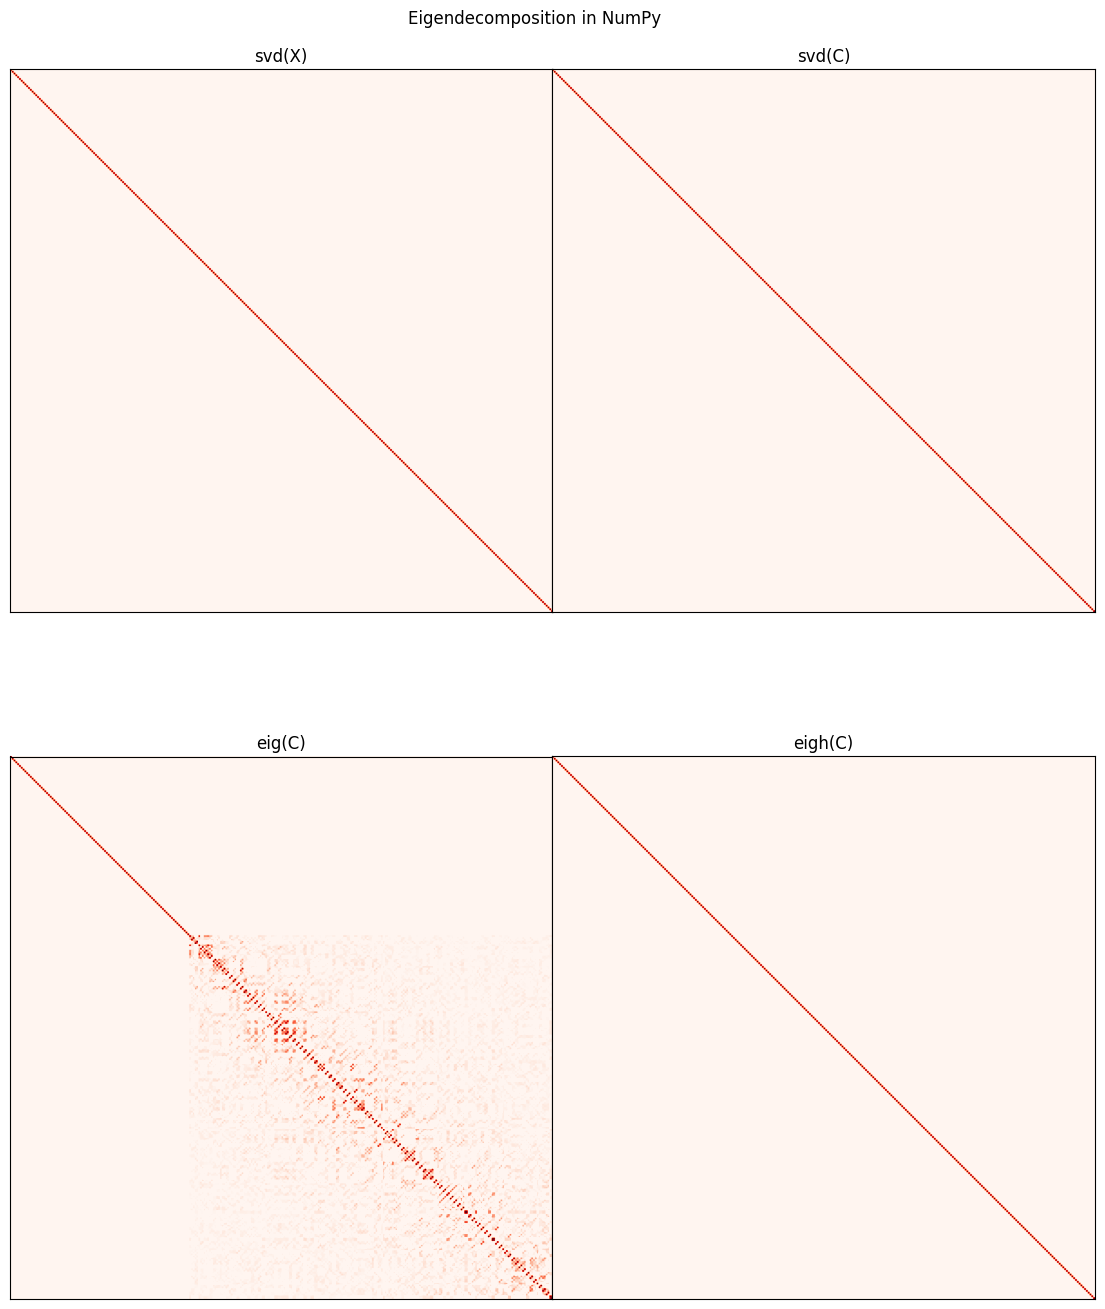

In [10]:
# Create figure environment
fig = plt.figure(figsize=(14,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 1. SVD on X
# ---------------------
U,s,VT = np.linalg.svd(X)
V = VT.T
ax1.imshow(V.T@V,cmap='Reds',vmin=0,vmax=1)

# 2. SVD on C
# ---------------------
V,eigenvalues,VT = np.linalg.svd(C)
ax2.imshow(V.T@V,cmap='Reds',vmin=0,vmax=1)
# 3. Eigendecomposition on C
# -> linalg.eig()
# ---------------------
eigenvalues,V = np.linalg.eig(C)
sortIdx = np.argsort(eigenvalues)[::-1]
V = V[:,sortIdx]
ax3.imshow((V.T@V).real,cmap='Reds',vmin=0,vmax=1)

# 4. Eigendecomposition on C
# -> linalg.eigh()
# ---------------------
eigenvalues,V = np.linalg.eigh(C)
sortIdx = np.argsort(eigenvalues)[::-1]
V = V[:,sortIdx]
ax4.imshow((V.T@V).real,cmap='Reds',vmin=0,vmax=1)

for a in [ax1,ax2,ax3,ax4]:
    a.set_xticks([])
    a.set_yticks([])
ax1.set_title('svd(X)')
ax2.set_title('svd(C)')
ax3.set_title('eig(C)')
ax4.set_title('eigh(C)')
fig.subplots_adjust(wspace=0,top=0.95)  
fig.suptitle('Eigendecomposition in NumPy')
plt.show()